In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

1. Data Collections

In [2]:
# load dataset
dataset = pd.read_csv("dataset/dataset_enso.csv", parse_dates=["acq_date"])
dataset = dataset[["acq_date", "hotspot", "sst_anom", "oni_anom", "soi_anom"]]
dataset = dataset.set_index("acq_date")

In [3]:
# show dataset
print(np.round(dataset.describe(), 2))

        hotspot  sst_anom  oni_anom  soi_anom
count    276.00    276.00    276.00    276.00
mean     595.02      0.01     -0.03      0.39
std     1664.50      0.77      0.82      1.53
min        3.00     -1.59     -1.64     -5.20
25%       20.00     -0.55     -0.61     -0.60
50%       54.00     -0.07     -0.14      0.30
75%      255.75      0.47      0.47      1.32
max    14437.00      2.72      2.64      4.80


In [4]:
# show dataset
print(dataset.tail())

            hotspot  sst_anom  oni_anom  soi_anom
acq_date                                         
2023-08-31      186      1.30      1.32      -1.4
2023-09-30     2247      1.53      1.56      -2.1
2023-10-31     3200      1.59      1.78      -0.8
2023-11-30      390      1.90      1.92      -1.3
2023-12-31       42      1.99      1.97      -0.4


In [5]:
def lineplot(x, y, label, color):
  
  # membuat time series plot
  fig, ax = plt.subplots(figsize=(8,4))
  ax.plot(x, y, color="tab:"+str(color), label=label, linewidth=2)

  # membuat label-label
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)

  # menampilkan plot
  plt.show()

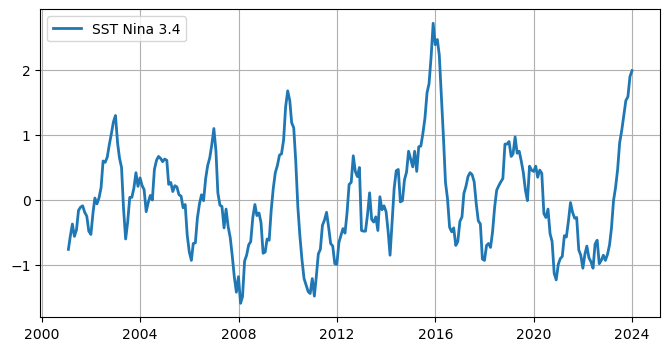

In [6]:
lineplot(dataset.index, dataset["sst_anom"], "SST Nina 3.4", "blue")

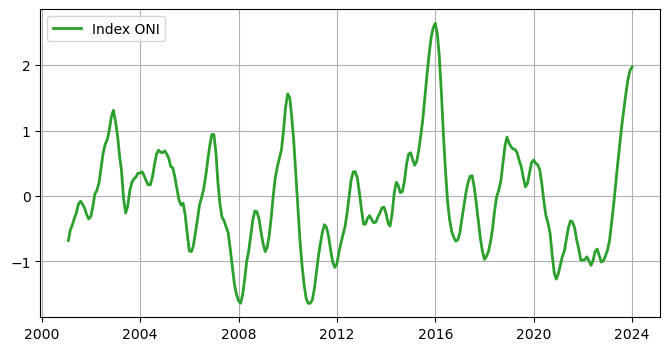

In [7]:
lineplot(dataset.index, dataset["oni_anom"], "Index ONI", "green")

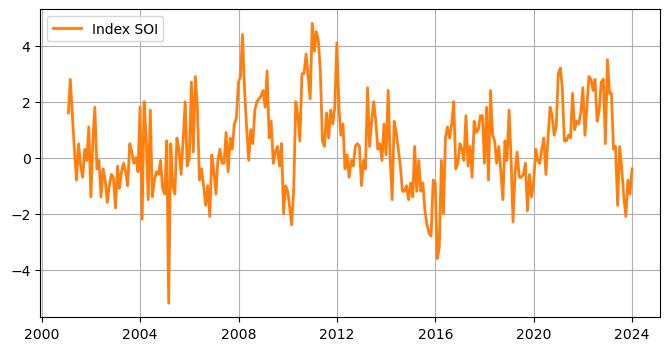

In [8]:
lineplot(dataset.index, dataset["soi_anom"], "Index SOI", "orange")

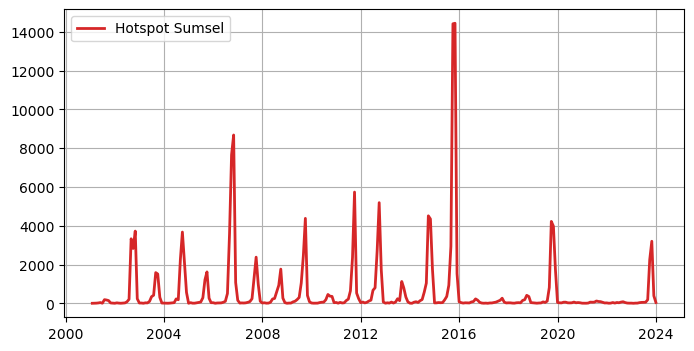

In [9]:
lineplot(dataset.index, dataset["hotspot"], "Hotspot Sumsel", "red")

2. Data Preprocessing

In [10]:
# choose features
data = dataset.filter(["acq_date", "sst_anom", "oni_anom", "soi_anom", "hotspot"]).values

In [11]:
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(np.array(data))

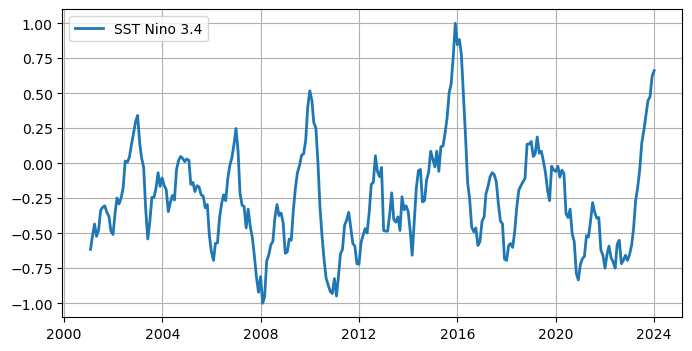

In [12]:
lineplot(dataset.index, scaled[:,0:1], "SST Nino 3.4", "blue")

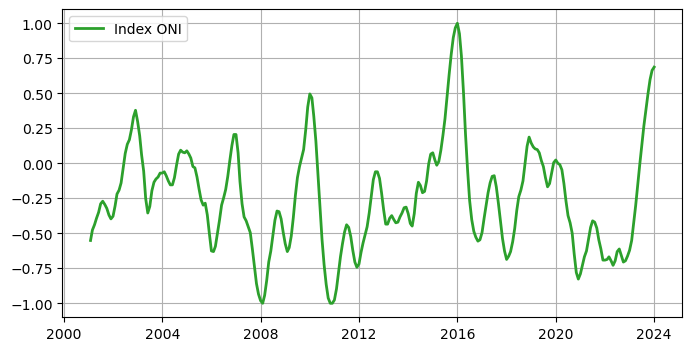

In [13]:
lineplot(dataset.index, scaled[:,1:2], "Index ONI", "green")

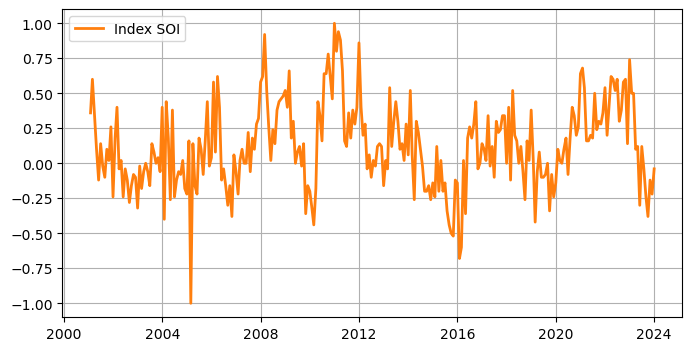

In [14]:
lineplot(dataset.index, scaled[:,2:3], "Index SOI", "orange")

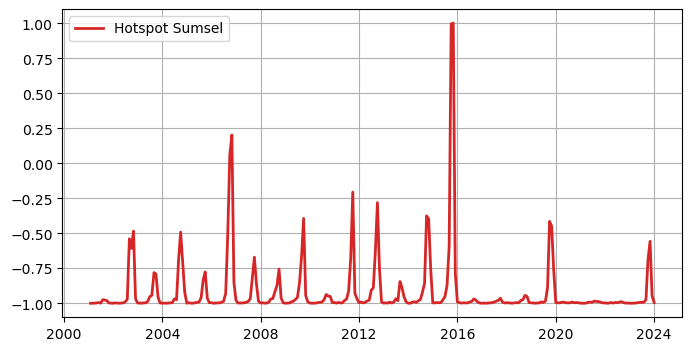

In [15]:
lineplot(dataset.index, scaled[:,3:4], "Hotspot Sumsel", "red")

3. Results of Preprocessing

In [16]:
acq_date = pd.DataFrame(dataset.index.values, columns=["acq_date"])
scaled = pd.DataFrame(scaled, columns=["sst_anom", "oni_anom", "soi_anom", "hotspot"])

In [17]:
df_normalized = pd.concat([acq_date,scaled], axis=1)
print(np.round(df_normalized,4))

      acq_date  sst_anom  oni_anom  soi_anom  hotspot
0   2001-01-31   -0.6148   -0.5514      0.36  -1.0000
1   2001-02-28   -0.5220   -0.4766      0.60  -0.9997
2   2001-03-31   -0.4339   -0.4393      0.34  -0.9990
3   2001-04-30   -0.5220   -0.3925      0.10  -0.9976
4   2001-05-31   -0.4756   -0.3505     -0.12  -0.9950
..         ...       ...       ...       ...      ...
271 2023-08-31    0.3411    0.3832     -0.24  -0.9746
272 2023-09-30    0.4478    0.4953     -0.38  -0.6891
273 2023-10-31    0.4756    0.5981     -0.12  -0.5570
274 2023-11-30    0.6195    0.6636     -0.22  -0.9464
275 2023-12-31    0.6613    0.6869     -0.04  -0.9946

[276 rows x 5 columns]


4. Splitting Data

In [18]:
# split data train and test
train_data, test_data = train_test_split(df_normalized, train_size=0.80, test_size=0.20, shuffle=False)

In [19]:
def lineplot(x1, y1, label1, x2, y2, label2, title):
  
  # membuat time series plot
  fig, ax = plt.subplots(figsize=(8,4))
  ax.plot(x1, y1, color="tab:blue", label=label1, linewidth=2)
  ax.plot(x2, y2, color="tab:orange", label=label2, linewidth=2)

  # membuat label-label
  ax.set_title(title, fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)

  # menampilkan plot
  plt.show()

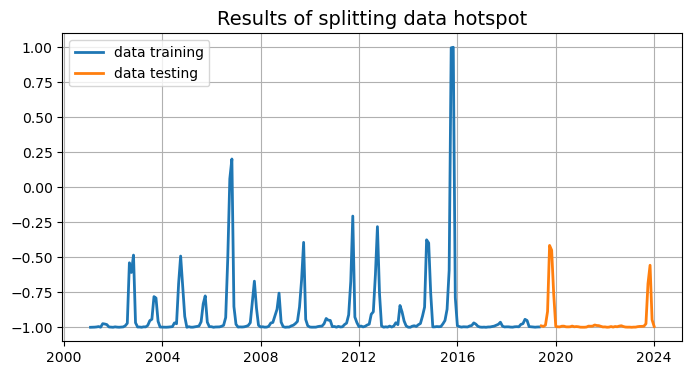

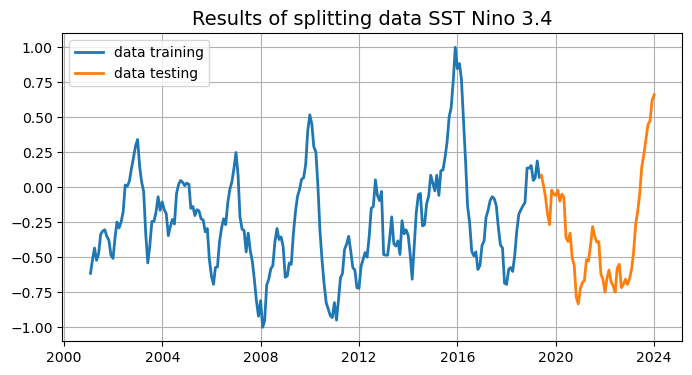

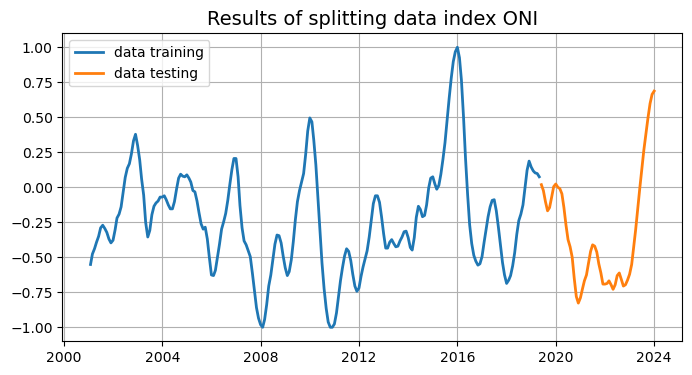

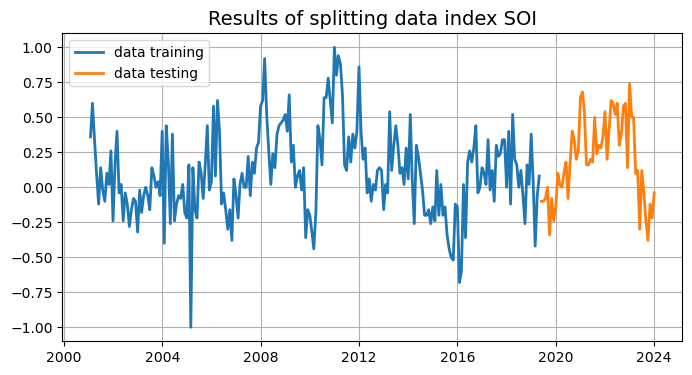

In [20]:
# custom tanggal
train = df_normalized["acq_date"].iloc[0:len(train_data)]
test = df_normalized["acq_date"].iloc[len(train_data):]

# hotspot
lineplot(
  title="Results of splitting data hotspot",
  x1=train, y1=train_data["hotspot"], label1="data training",
  x2=test, y2=test_data["hotspot"], label2="data testing",)

# SST Nino 3.4
lineplot(
  title="Results of splitting data SST Nino 3.4",
  x1=train, y1=train_data["sst_anom"], label1="data training",
  x2=test, y2=test_data["sst_anom"], label2="data testing",)

# Index ONI
lineplot(
  title="Results of splitting data index ONI",
  x1=train, y1=train_data["oni_anom"], label1="data training",
  x2=test, y2=test_data["oni_anom"], label2="data testing",)

# Index SOI
lineplot(
  title="Results of splitting data index SOI",
  x1=train, y1=train_data["soi_anom"], label1="data training",
  x2=test, y2=test_data["soi_anom"], label2="data testing",)